<a href="https://colab.research.google.com/github/ducbao811/diveintocode-ml/blob/master/Sprint_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Problem 1 to 4]

In [3]:
import numpy as np
import pandas as pd

In [50]:
class ScratchLogisticRegression():
    """
    Scratch implementation of logistic regression
    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process
    Attributes
    ----------
    self.coef_ : The following form of ndarray, shape (n_features,)
      Parameters
    self.loss : The following form of ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : The following form of ndarray, shape (self.iter,)
      Record loss on validation data
    """
    def __init__(self, num_iter, lr, bias, verbose):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.lamda = 0.1
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn logistic regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : The following forms of ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """
        
        self.y_label = np.unique(y)
        
        y = np.where(y == self.y_label[0],0,1)

        if y_val is not None:
          y_val = np.where(y_val == self.y_label[0], 0, 1)

        X1 = self._logistic_hypothesis(X)
        self.theta = np.random.rand(X1.shape[1])

        for i in range(self.iter):
          y1 = self._sigmoid_function(X1)
          error = y1 - y
          self.loss[i] += self._loss_function(y,y1)

          if X_val is not None:
            X2 = self._logistic_hypothesis(X_val)
            y2 = self._sigmoid_function(X2)
            self.val_loss[i] += self._loss_function(y_val,y2)

          if self.verbose and i % 100 == 0:
            print("n_iter: {} || loss: {} || val_loss: {}\n".format(i,self.loss[i],self.val_loss[i]))
        
          self._gradient_descent(error,X1)
          

    def predict(self, X):
        """
        Estimate the label using logistic regression.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """
        X = self._logistic_hypothesis(X)
        y_pred = self._sigmoid_function(X)
        return np.where(y_pred < 0.5, self.y_label[0], self.y_label[1])
    def predict_proba(self, X):
        """
        Estimate the probability using logistic regression.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """
        X = self._logistic_hypothesis(X)
        return self._sigmoid_function(X)
    def _sigmoid_function(self, X):
        """
        Calculate the result when applying the sigmoid function to X
        Parameters:
        ----------
        X: The following forms of ndarray, shape (n_samples, n_features + 1)
        sample
        """
        return 1 / (1 + np.exp(-np.dot(X,self.theta)))
    def _gradient_descent(self, error, X):
        """
          Updating theta using gradient descent method
          --------
          Parameters:
          error: Error between real value and estimated value, shape (n_samples,)
          X: Features of training data, shape (n_samples, n_features)
        """
        factor = (np.dot(error,X) + self.lamda * self.theta) / len(X)
        self.theta = self.theta - self.lr * factor

    def _logistic_hypothesis(self, X):
        """
          Checking for bias term
          Parameters
          ----------
          X : input data, shape (n_samples, n_features)
            Training data
        """
        if self.bias:
            bias_cof = np.ones((X.shape[0],1))
        else:
            bias_cof = np.zeros((X.shape[0],1))

        return np.hstack((X,bias_cof))

    def _loss_function(self, y, y_pred):
        """
          Calculate the loss function value
          --------
          Parameters:
          y: actual value of data, shape (n_samples,)
          y_pred: predicted value using sigmoid function, shape (n_samples,) 
        """ 
        return np.mean(-y*np.log(y_pred) - (1-y)*np.log(1-y_pred)) + 0.5*self.lamda*(self.theta[:1]**2)/len(y) 

# [Problem 5]

In [93]:
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(np.hstack((iris.data,iris.target.reshape(-1,1))))
X = df.loc[df[4] != 0,2:3].values
y = df.loc[df[4] != 0, 4].values

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [95]:
model = ScratchLogisticRegression(num_iter=5000,lr = 0.001, bias=True,verbose=True)
model.fit(X_train_std,y_train)

n_iter: 0 || loss: 0.3819335732623004 || val_loss: 0.0

n_iter: 100 || loss: 0.3732520061203128 || val_loss: 0.0

n_iter: 200 || loss: 0.36508025118707205 || val_loss: 0.0

n_iter: 300 || loss: 0.35737561465677214 || val_loss: 0.0

n_iter: 400 || loss: 0.35009980596355 || val_loss: 0.0

n_iter: 500 || loss: 0.3432184237431459 || val_loss: 0.0

n_iter: 600 || loss: 0.3367005051206638 || val_loss: 0.0

n_iter: 700 || loss: 0.33051813083575965 || val_loss: 0.0

n_iter: 800 || loss: 0.3246460793707576 || val_loss: 0.0

n_iter: 900 || loss: 0.3190615239404776 || val_loss: 0.0

n_iter: 1000 || loss: 0.31374376688698247 || val_loss: 0.0

n_iter: 1100 || loss: 0.30867400667000033 || val_loss: 0.0

n_iter: 1200 || loss: 0.30383513323961303 || val_loss: 0.0

n_iter: 1300 || loss: 0.2992115481156793 || val_loss: 0.0

n_iter: 1400 || loss: 0.2947890059774253 || val_loss: 0.0

n_iter: 1500 || loss: 0.2905544749889965 || val_loss: 0.0

n_iter: 1600 || loss: 0.2864960134564912 || val_loss: 0.0

n_ite

In [96]:
# Prediction
y_pred = model.predict(X_test_std)
y_pred_proba = model.predict_proba(X_test_std)

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average="binary")
recall = recall_score(y_test,y_pred, average="binary")
print("Accuracy: {} \nPrecision: {}\nRecall: {}\n".format(accuracy,precision,recall))

Accuracy: 0.92 
Precision: 0.875
Recall: 1.0



In [98]:
# Skcit-learn implementation
from sklearn.linear_model import LogisticRegression
sk_model = LogisticRegression(max_iter=5000)
sk_model.fit(X_train_std,y_train)

# Prediction
y_pred_sk = sk_model.predict(X_test_std)
y_pred_proba_sk = sk_model.predict_proba(X_test_std)

# Metrics score
accuracy_sk = accuracy_score(y_test,y_pred_sk)
precision_sk = precision_score(y_test,y_pred_sk,average="binary")
recall_sk = recall_score(y_test,y_pred_sk, average="binary")
print("Accuracy: {} \nPrecision: {}\nRecall: {}\n".format(accuracy_sk,precision_sk,recall_sk))

Accuracy: 0.88 
Precision: 0.8666666666666667
Recall: 0.9285714285714286



Surprisingly, the scratch model seems to perform better than model imported from sklearn with the 5000 iterations.

#[Problem 6]

[]

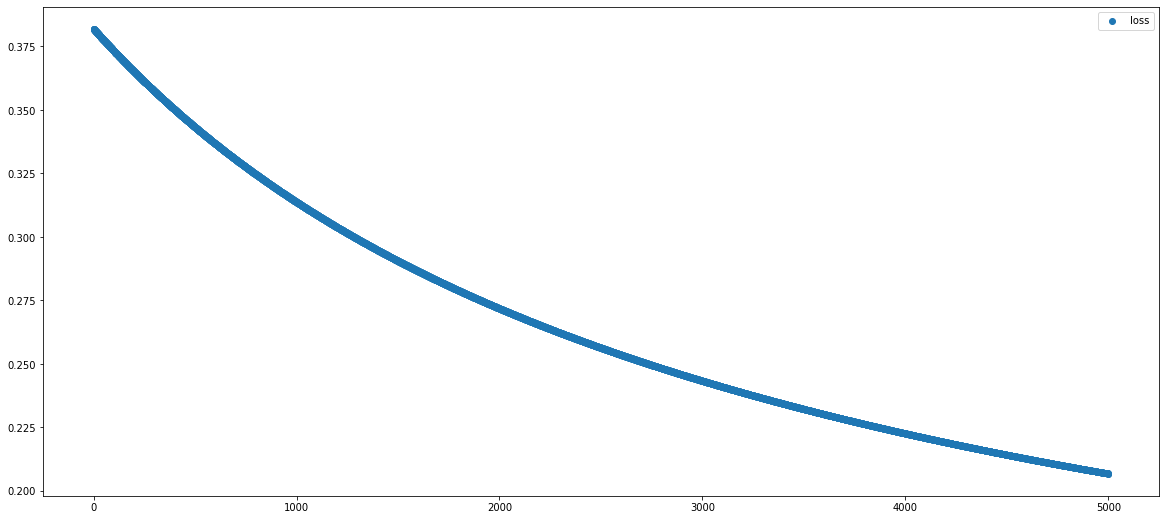

In [99]:
# Plot the learning curve
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,9))
plt.scatter(range(len(model.loss)),model.loss,label="loss")
plt.legend()
plt.plot()

# [Problem 7]

For visualizing the decision region, I re-use the sample code from pre-class assignment in week 4.

In [102]:
# Visualization of decision area
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'green']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

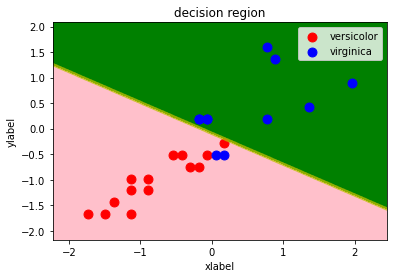

In [104]:
decision_region(X_test_std,y_test,model)